In [1]:
#Downloading Data from Yahoo Finance using the Quantmod Library 
library(quantmod)
DJ<- getSymbols("^DJI", from="2016-01-01", to = "2021-01-01", auto.assign = FALSE)
periodicity(DJ)
head(DJ)

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




Daily periodicity from 2016-01-04 to 2020-12-31 

           DJI.Open DJI.High  DJI.Low DJI.Close DJI.Volume DJI.Adjusted
2016-01-04 17405.48 17405.48 16957.63  17148.94  148060000     17148.94
2016-01-05 17147.50 17195.84 17038.61  17158.66  105750000     17158.66
2016-01-06 17154.83 17154.83 16817.62  16906.51  120250000     16906.51
2016-01-07 16888.36 16888.36 16463.63  16514.10  176240000     16514.10
2016-01-08 16519.17 16651.89 16314.57  16346.45  141850000     16346.45
2016-01-11 16358.71 16461.85 16232.03  16398.57  127790000     16398.57

[1] 1259

[1] 1259

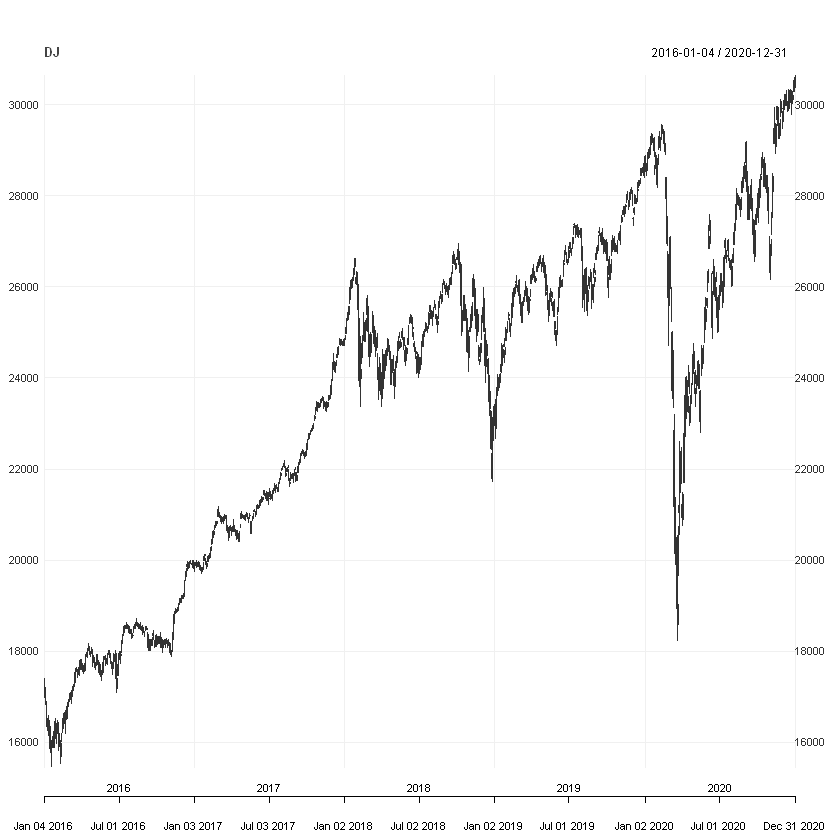

In [2]:
#Removing observations with missing values and Plotting the Time Series
nrow(DJ)
DJ<- na.omit(DJ)
nrow(DJ)
chart_Series(DJ)

In [3]:
#Adding the Independent Variables
#Open-Close Calculation
n<-1259
i=1
Open.Close<-numeric(1259
)
for(i in 1:n){
    Open.Close[i]<-Op(DJ)[i] - Cl(DJ)[i]
    i<-i+1}
DJ<-cbind(DJ, Open.Close)

#High-Low Calculation
j=1
High.Low<-numeric(1259)
for (j in 1:1259){
    High.Low[j]<- Hi(DJ)[j] - Lo(DJ)[j]
    j<-j+1}
DJ<-cbind(DJ,High.Low)

#RDiff-Volume Calculation
Diff.Volume<-numeric(1259)
Diff.Volume <- Vo(DJ) - lag(Vo(DJ), 1)
DJ<-cbind(DJ, Diff.Volume)
names(DJ)[9]<-"Diff.Volume"
head(DJ)

           DJI.Open DJI.High  DJI.Low DJI.Close DJI.Volume DJI.Adjusted
2016-01-04 17405.48 17405.48 16957.63  17148.94  148060000     17148.94
2016-01-05 17147.50 17195.84 17038.61  17158.66  105750000     17158.66
2016-01-06 17154.83 17154.83 16817.62  16906.51  120250000     16906.51
2016-01-07 16888.36 16888.36 16463.63  16514.10  176240000     16514.10
2016-01-08 16519.17 16651.89 16314.57  16346.45  141850000     16346.45
2016-01-11 16358.71 16461.85 16232.03  16398.57  127790000     16398.57
           Open.Close High.Low Diff.Volume
2016-01-04  256.54102 447.8496          NA
2016-01-05  -11.16016 157.2305   -42310000
2016-01-06  248.32031 337.2109    14500000
2016-01-07  374.25977 424.7285    55990000
2016-01-08  172.71973 337.3203   -34390000
2016-01-11  -39.86035 229.8193   -14060000

In [4]:
#Adding the dependent Variable
#Returns Calculation
Returns<-numeric(1259)
Returns  <- 100 * (Ad(DJ) - lag(Ad(DJ), 1)) / lag(Ad(DJ),1)
DJ<-cbind(DJ,Returns)
names(DJ)[10]<-"Returns"
head(DJ)

#Coversion in Factor
DJ<-DJ[-1259,]
Y<-ifelse(DJ$Returns<0,-1,1)
DJ<-cbind.data.frame(DJ,Y)
names(DJ)[11]<-"Y"
head(DJ)

B.S<-as.factor(Y)
B.S<-ifelse(Y==-1, "Sell", "Buy")
DJ<-cbind.data.frame(DJ,B.S)
names(DJ)[12]<-"B.S"
head(DJ)


           DJI.Open DJI.High  DJI.Low DJI.Close DJI.Volume DJI.Adjusted
2016-01-04 17405.48 17405.48 16957.63  17148.94  148060000     17148.94
2016-01-05 17147.50 17195.84 17038.61  17158.66  105750000     17158.66
2016-01-06 17154.83 17154.83 16817.62  16906.51  120250000     16906.51
2016-01-07 16888.36 16888.36 16463.63  16514.10  176240000     16514.10
2016-01-08 16519.17 16651.89 16314.57  16346.45  141850000     16346.45
2016-01-11 16358.71 16461.85 16232.03  16398.57  127790000     16398.57
           Open.Close High.Low Diff.Volume     Returns
2016-01-04  256.54102 447.8496          NA          NA
2016-01-05  -11.16016 157.2305   -42310000  0.05668399
2016-01-06  248.32031 337.2109    14500000 -1.46952261
2016-01-07  374.25977 424.7285    55990000 -2.32105954
2016-01-08  172.71973 337.3203   -34390000 -1.01518955
2016-01-11  -39.86035 229.8193   -14060000  0.31884671

,DJI.Open,DJI.High,DJI.Low,DJI.Close,DJI.Volume,DJI.Adjusted,Open.Close,High.Low,Diff.Volume,Returns,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-04,17405.48,17405.48,16957.63,17148.94,148060000,17148.94,256.54102,447.8496,NA,NA,NA
2016-01-05,17147.50,17195.84,17038.61,17158.66,105750000,17158.66,-11.16016,157.2305,-42310000,0.05668399,1
2016-01-06,17154.83,17154.83,16817.62,16906.51,120250000,16906.51,248.32031,337.2109,14500000,-1.46952261,-1
2016-01-07,16888.36,16888.36,16463.63,16514.10,176240000,16514.10,374.25977,424.7285,55990000,-2.32105954,-1
2016-01-08,16519.17,16651.89,16314.57,16346.45,141850000,16346.45,172.71973,337.3203,-34390000,-1.01518955,-1
2016-01-11,16358.71,16461.85,16232.03,16398.57,127790000,16398.57,-39.86035,229.8193,-14060000,0.31884671,1


,DJI.Open,DJI.High,DJI.Low,DJI.Close,DJI.Volume,DJI.Adjusted,Open.Close,High.Low,Diff.Volume,Returns,Y,B.S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2016-01-04,17405.48,17405.48,16957.63,17148.94,148060000,17148.94,256.54102,447.8496,NA,NA,NA,NA
2016-01-05,17147.50,17195.84,17038.61,17158.66,105750000,17158.66,-11.16016,157.2305,-42310000,0.05668399,1,Buy
2016-01-06,17154.83,17154.83,16817.62,16906.51,120250000,16906.51,248.32031,337.2109,14500000,-1.46952261,-1,Sell
2016-01-07,16888.36,16888.36,16463.63,16514.10,176240000,16514.10,374.25977,424.7285,55990000,-2.32105954,-1,Sell
2016-01-08,16519.17,16651.89,16314.57,16346.45,141850000,16346.45,172.71973,337.3203,-34390000,-1.01518955,-1,Sell
2016-01-11,16358.71,16461.85,16232.03,16398.57,127790000,16398.57,-39.86035,229.8193,-14060000,0.31884671,1,Buy


In [5]:
#Data split into 80% and 20%
train<-DJ[2:1007,]
validate<-DJ[1007:1259,]

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: sandwich




	 Conditional inference tree with 4 terminal nodes

Response:  B.S 
Inputs:  Open.Close, High.Low, Diff.Volume 
Number of observations:  1006 

1) Open.Close <= 8.119141; criterion = 1, statistic = 363.714
  2) Open.Close <= -30.40039; criterion = 1, statistic = 33.172
    3)*  weights = 422 
  2) Open.Close > -30.40039
    4)*  weights = 175 
1) Open.Close > 8.119141
  5) Open.Close <= 34.20117; criterion = 1, statistic = 16.54
    6)*  weights = 107 
  5) Open.Close > 34.20117
    7)*  weights = 302 

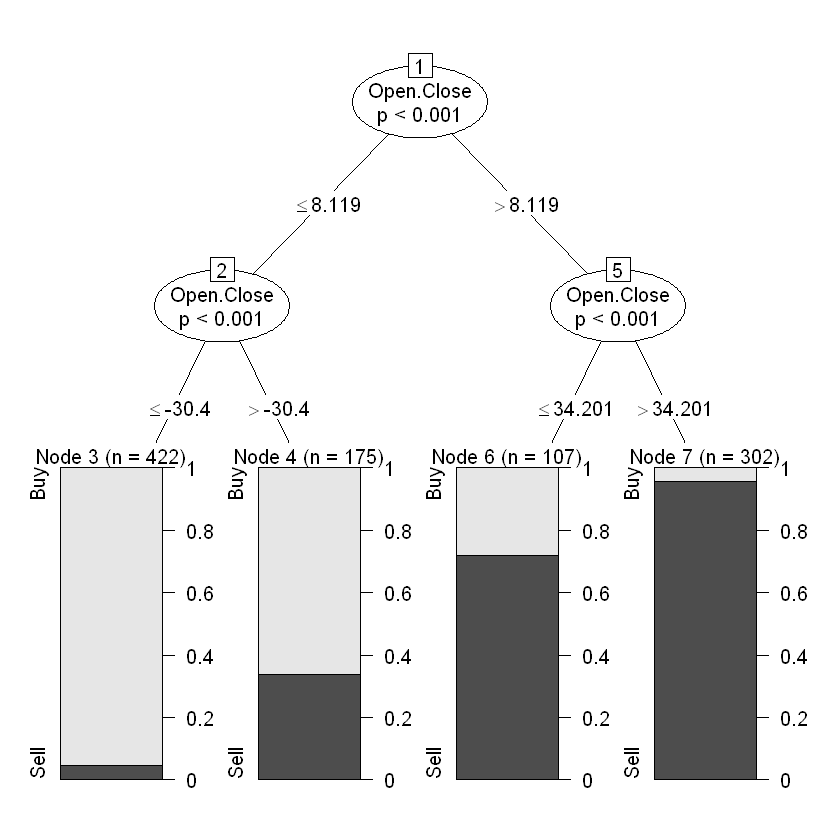

In [6]:
#Modelling the CART Decision Tree using the Party Library
library(party)
train$B.S <- as.factor(train$B.S)
tree<-ctree(B.S~ Open.Close+High.Low+Diff.Volume, data = train)
tree
plot(tree)


Call:
C5.0.formula(formula = B.S ~ Diff.Volume + Open.Close + High.Low, data = train)


C5.0 [Release 2.07 GPL Edition]  	Sun Aug 29 13:34:58 2021
-------------------------------

Class specified by attribute `outcome'

Read 1006 cases (4 attributes) from undefined.data

Decision tree:

Open.Close <= 8.119141: Buy (597/79)
Open.Close > 8.119141: Sell (409/43)


Evaluation on training data (1006 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2  122(12.1%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   518    43    (a): class Buy
	    79   366    (b): class Sell


	Attribute usage:

	100.00%	Open.Close


Time: 0.0 secs


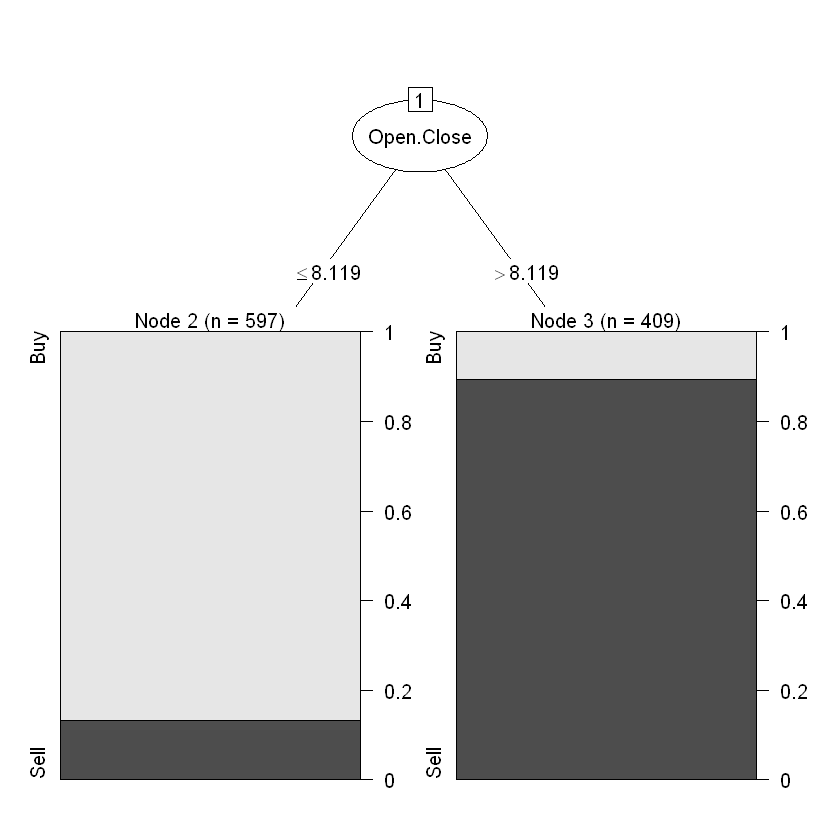

In [7]:
#Modelling the C5.0 Decision Tree
library(C50)
m2<-C5.0(B.S~Diff.Volume+Open.Close+High.Low, data= train)
summary(m2)
plot(m2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



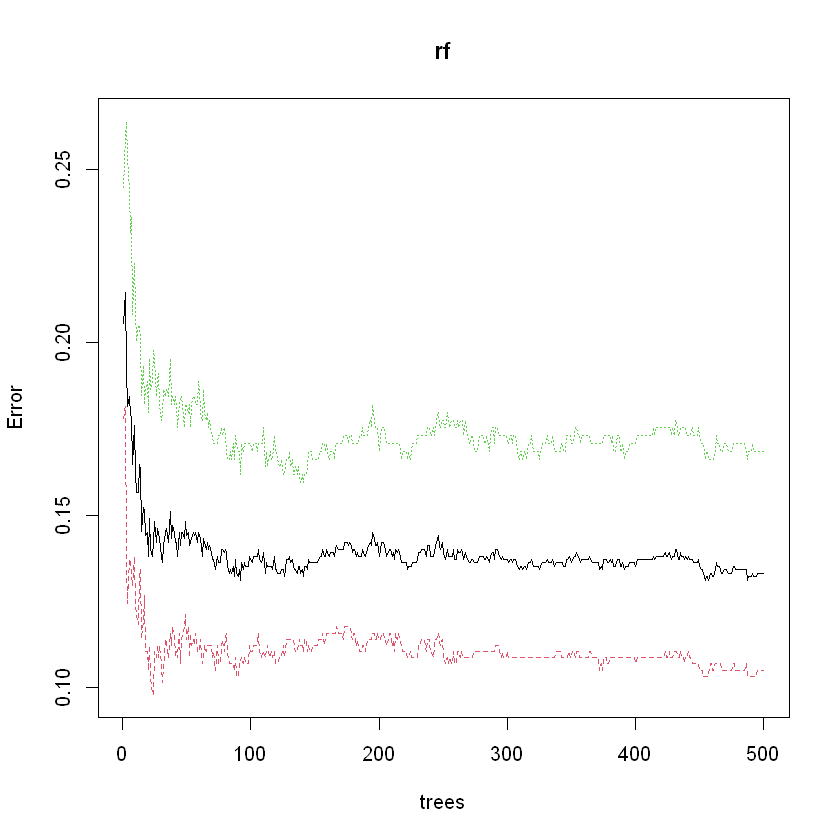

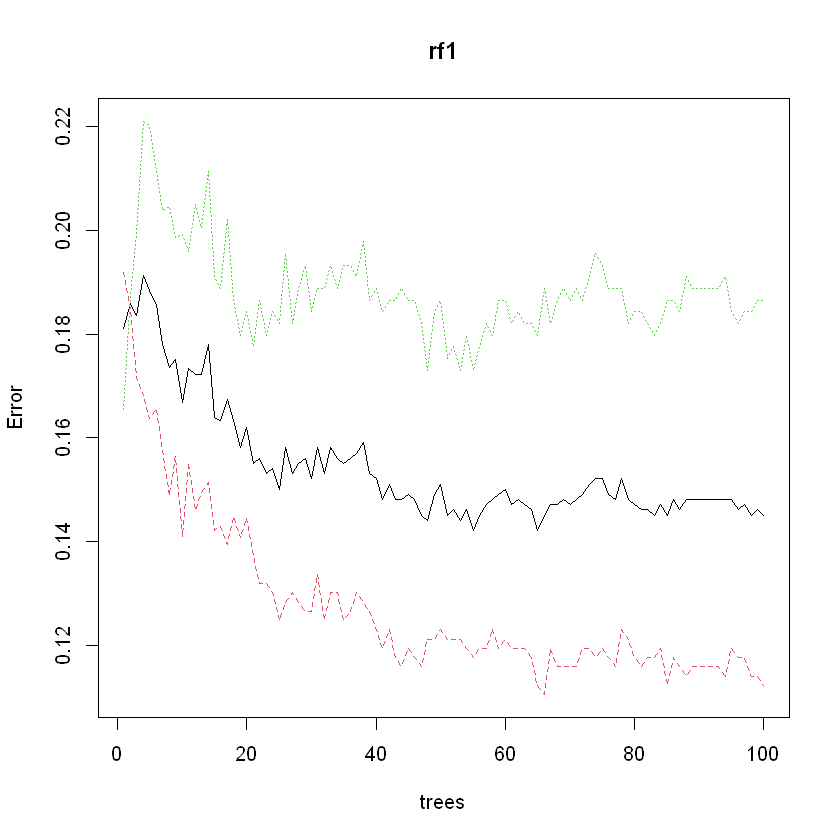

In [8]:
#Creating the Random Forest Model
library(randomForest)
set.seed(222)
rf<-randomForest(B.S~Diff.Volume + Open.Close + High.Low, data = train)
plot(rf)

#With 100 Trees in the Data Test
set.seed(222)
rf1<-randomForest(B.S~Diff.Volume+Open.Close+High.Low, data=train,
                  ntree = 100,
                  mtry = 3,
                  importance = TRUE,
                  proximity = TRUE)
plot(rf1)

In [9]:
nrow(DJ)
DJ<- na.omit(DJ)
nrow(DJ)

[1] 1258

[1] 1257

In [10]:
#Min-Max Normalisation
DJ$Diff.Volume<-(DJ$Diff.Volume- min(DJ$Diff.Volume))/(max(DJ$Diff.Volume)-min(DJ$Diff.Volume))
DJ$Open.Close<-(DJ$Open.Close- min(DJ$Open.Close))/(max(DJ$Open.Close)-min(DJ$Open.Close))
DJ$High.Low<-(DJ$High.Low- min(DJ$High.Low))/(max(DJ$High.Low)-min(DJ$High.Low))

ANN<-ifelse(DJ$Returns<0,0,1)
DJ<-cbind(DJ,ANN)
head(DJ)

#Data Split
training<-DJ[2:1007,]
testing<-DJ[1008:1257,]

#Modelling theArtificial Neural Network
library(neuralnet)
set.seed(333)
n<-neuralnet(ANN~Diff.Volume+Open.Close+High.Low,
            data= training,
            hidden =1,
            err.fct = "ce",
            linear.output = FALSE,
            stepmax=1e7)
plot(n)
summary(n)

,DJI.Open,DJI.High,DJI.Low,DJI.Close,DJI.Volume,DJI.Adjusted,Open.Close,High.Low,Diff.Volume,Returns,Y,B.S,ANN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2016-01-05,17147.50,17195.84,17038.61,17158.66,105750000,17158.66,0.5074253,0.06534027,0.5344779,0.05668399,1,Buy,1
2016-01-06,17154.83,17154.83,16817.62,16906.51,120250000,16906.51,0.6170894,0.16162251,0.5897067,-1.46952261,-1,Sell,0
2016-01-07,16888.36,16888.36,16463.63,16514.10,176240000,16514.10,0.6703151,0.20844087,0.6300419,-2.32105954,-1,Sell,0
2016-01-08,16519.17,16651.89,16314.57,16346.45,141850000,16346.45,0.5851384,0.16168103,0.5421775,-1.01518955,-1,Sell,0
2016-01-11,16358.71,16461.85,16232.03,16398.57,127790000,16398.57,0.4952958,0.10417237,0.5619416,0.31884671,1,Buy,1
2016-01-12,16419.11,16591.35,16322.07,16516.22,117480000,16516.22,0.4710998,0.12528185,0.5655872,0.71744297,1,Buy,1


                    Length Class      Mode    
call                   7   -none-     call    
response            1006   -none-     numeric 
covariate           3018   -none-     numeric 
model.list             2   -none-     list    
err.fct                1   -none-     function
act.fct                1   -none-     function
linear.output          1   -none-     logical 
data                  13   data.frame list    
exclude                0   -none-     NULL    
net.result             1   -none-     list    
weights                1   -none-     list    
generalized.weights    1   -none-     list    
startweights           1   -none-     list    
result.matrix          9   -none-     numeric 

In [11]:
#Tuning The Support Vector Machine Model
library(e1071)
set.seed(1234)
tmodel<-tune(svm,B.S ~ Diff.Volume + Open.Close + High.Low, data = train,
            kernel = "radial",
            ranges = list (epsilon = seq(0,1,0.1), cost = 2^(2:9)))

#Best Model
mymodel2<-tmodel$best.model
summary(mymodel2)




Call:
best.tune(method = svm, train.x = B.S ~ Diff.Volume + Open.Close + 
    High.Low, data = train, ranges = list(epsilon = seq(0, 1, 0.1), 
    cost = 2^(2:9)), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  256 

Number of Support Vectors:  335

 ( 171 164 )


Number of Classes:  2 

Levels: 
 Buy Sell




,Close,SMA_S,SMA_L
"[1252,]",30015.51,30173.78,30032.55
"[1253,]",30129.83,30168.84,30036.73
"[1254,]",30199.87,30148.14,30053.10
"[1255,]",30403.97,30193.13,30077.78
"[1256,]",30335.67,30216.97,30112.64
"[1257,]",30409.56,30295.78,30141.92


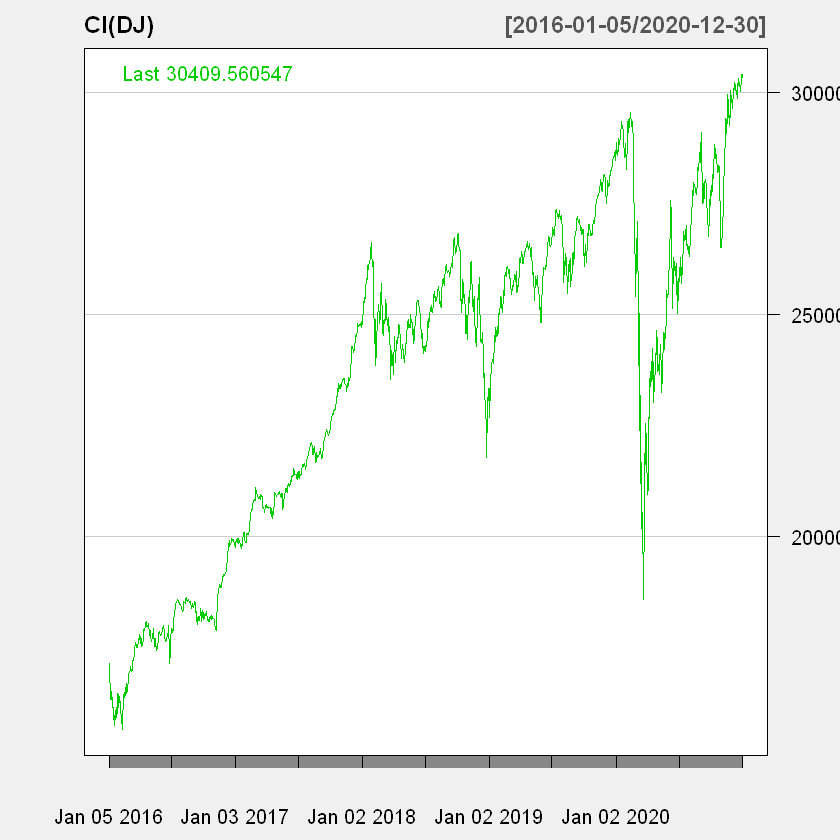

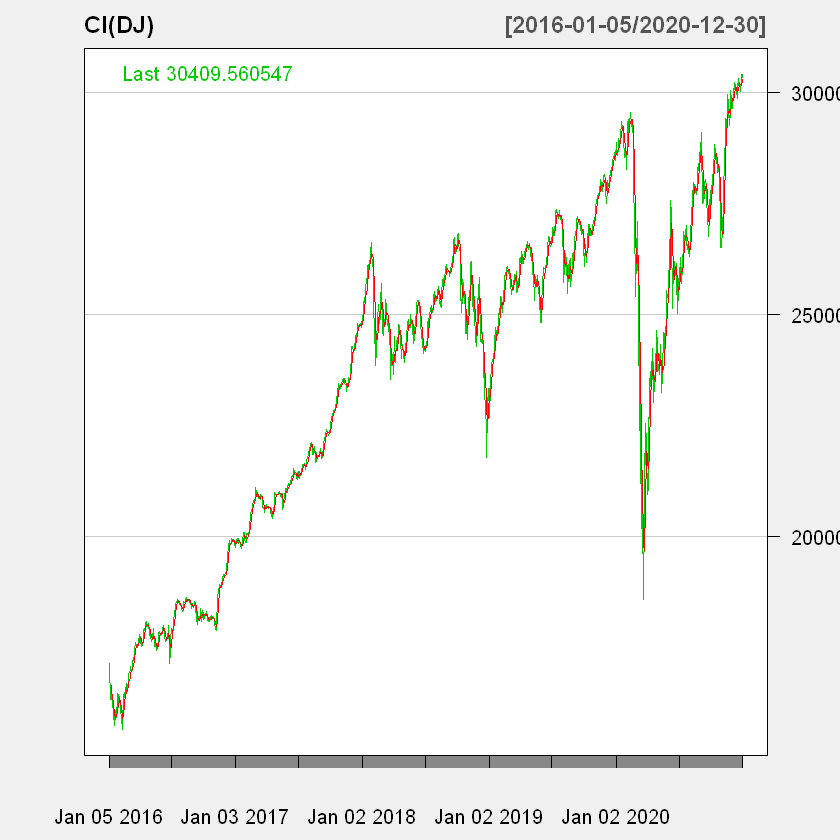

,Close,SMA_S,SMA_L,diff
"[1252,]",30015.51,30173.78,30032.55,141.2287
"[1253,]",30129.83,30168.84,30036.73,132.1074
"[1254,]",30199.87,30148.14,30053.10,95.0375
"[1255,]",30403.97,30193.13,30077.78,115.3414
"[1256,]",30335.67,30216.97,30112.64,104.3341
"[1257,]",30409.56,30295.78,30141.92,153.8622


,Close,SMA_S,SMA_L,diff,SIGNAL
"[1252,]",30015.51,30173.78,30032.55,141.2287,1
"[1253,]",30129.83,30168.84,30036.73,132.1074,1
"[1254,]",30199.87,30148.14,30053.10,95.0375,1
"[1255,]",30403.97,30193.13,30077.78,115.3414,1
"[1256,]",30335.67,30216.97,30112.64,104.3341,1
"[1257,]",30409.56,30295.78,30141.92,153.8622,1


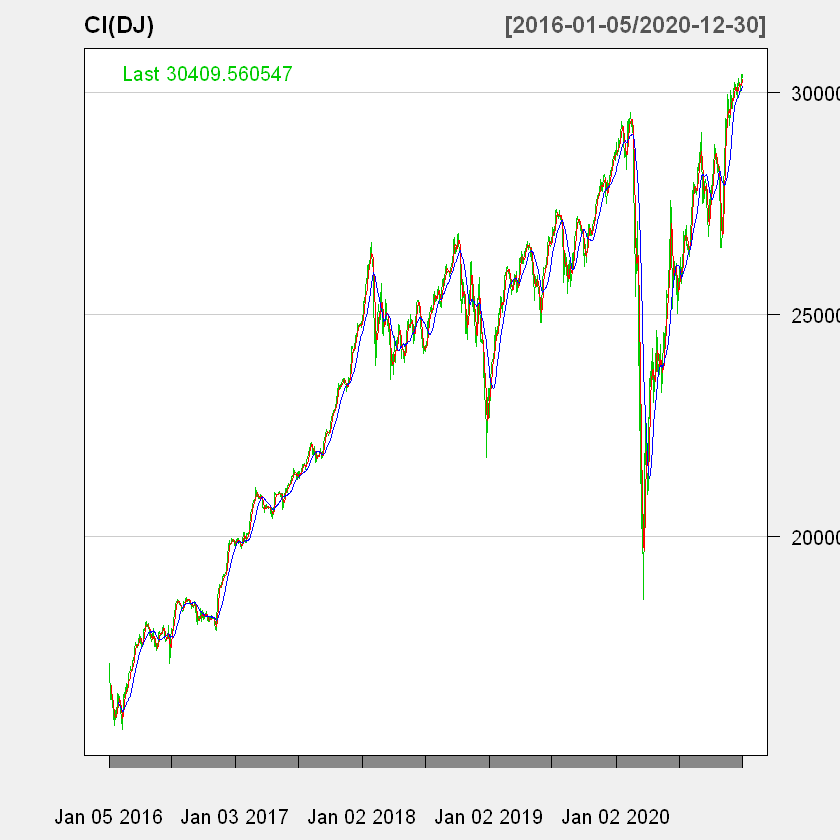

In [12]:
# Calucation of Simple Moving Average using the Quantmod Library
#Calculation of SMA
library(quantmod)
sma<-cbind(DJ$DJI.Close, SMA (DJ$DJI.Close, 5), SMA(DJ$DJI.Close, 20))
colnames(sma)<-c('Close', 'SMA_S', 'SMA_L')
tail(sma)

#Plotting SMA
lineChart(Cl(DJ), theme='white')
addSMA(n=5, col = 'red')
addSMA(n=20, col = 'blue')

#Calculation of Difference
diff<-numeric(1257)
diff<-sma[,2]-sma[,3]
sma<-cbind(sma,diff)
names(sma)[4]<-"diff"
tail(sma)

#Generating the Signal
SIGNAL<-ifelse(diff<0,0,1)
sma<-cbind(sma,SIGNAL)
tail(sma)



In [13]:
test <- getSymbols("^DJI", from="2016-01-05", to = "2021-01-01", auto.assign = FALSE)
periodicity(test)
head(test)

Daily periodicity from 2016-01-05 to 2020-12-31 

           DJI.Open DJI.High  DJI.Low DJI.Close DJI.Volume DJI.Adjusted
2016-01-05 17147.50 17195.84 17038.61  17158.66  105750000     17158.66
2016-01-06 17154.83 17154.83 16817.62  16906.51  120250000     16906.51
2016-01-07 16888.36 16888.36 16463.63  16514.10  176240000     16514.10
2016-01-08 16519.17 16651.89 16314.57  16346.45  141850000     16346.45
2016-01-11 16358.71 16461.85 16232.03  16398.57  127790000     16398.57
2016-01-12 16419.11 16591.35 16322.07  16516.22  117480000     16516.22

,macd,signal
"[1252,]",0.9568798,1.1581232
"[1253,]",0.9001270,1.1065240
"[1254,]",0.8639516,1.0580095
"[1255,]",0.8797707,1.0223617
"[1256,]",0.8638821,0.9906658
"[1257,]",0.8610127,0.9647352


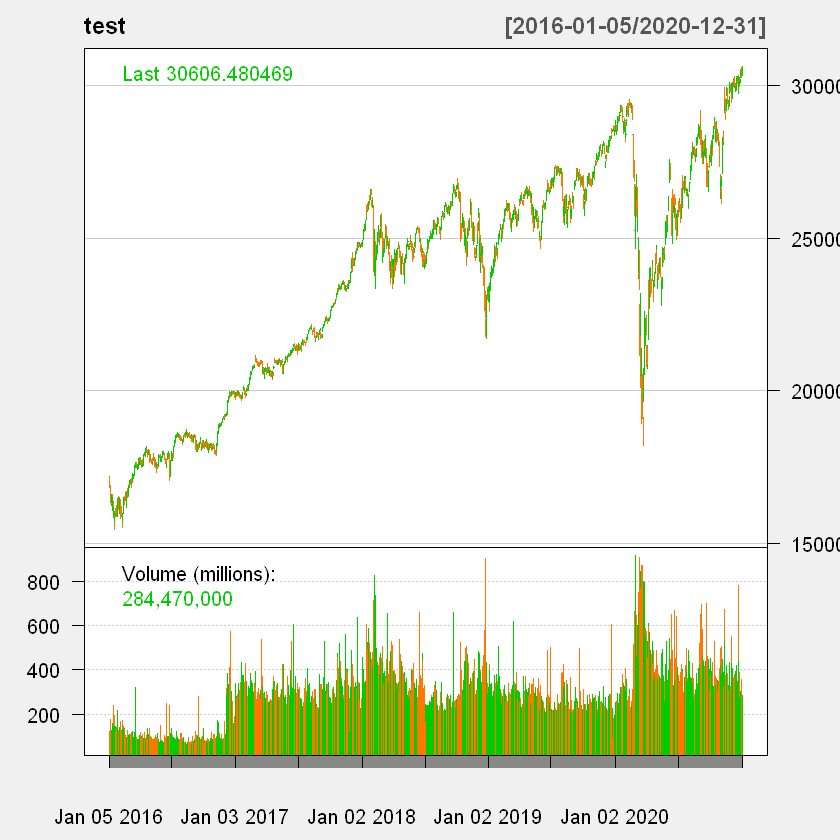

macd,signal,Y,y
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


,macd,signal,Y
"[245,]",0.9568798,1.1581232,0
"[246,]",0.9001270,1.1065240,0
"[247,]",0.8639516,1.0580095,0
"[248,]",0.8797707,1.0223617,0
"[249,]",0.8638821,0.9906658,0
"[250,]",0.8610127,0.9647352,0


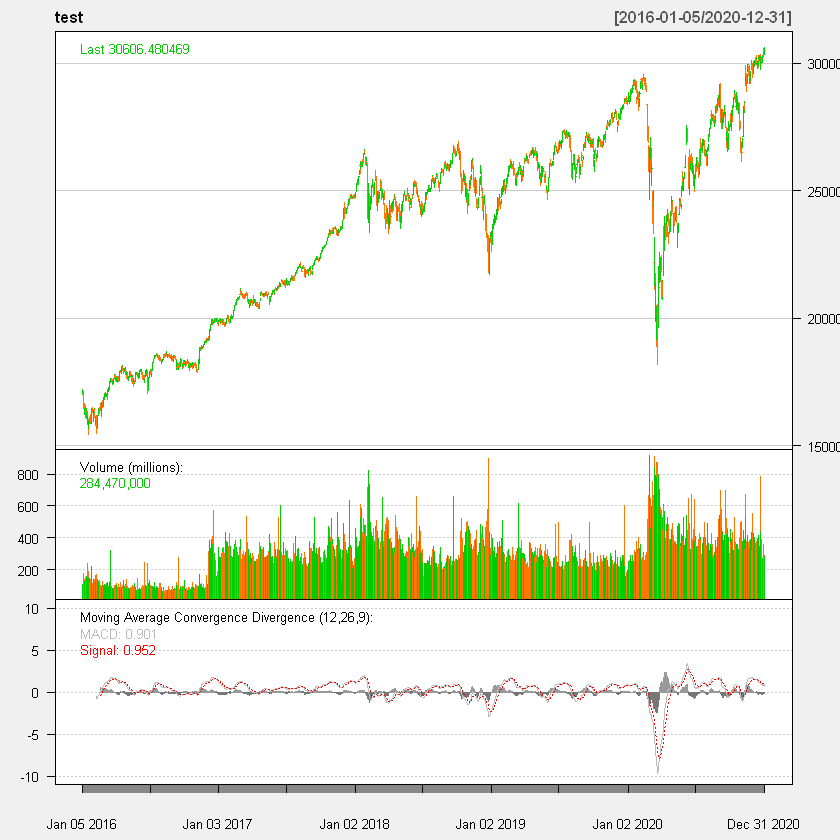

In [14]:
#Calucation of Moving Average Convergence Divergence using the Quantmod and TTR Libraries
library(quantmod)
library(TTR)
macd<-MACD(DJ$DJI.Close ,nFast=12, nSlow=26,nSig=9)
tail(macd)

#Plotting MACD
barChart(test, theme=chartTheme("white"))
addMACD(fast=12, slow=26, signal=9)

#Calculation of the Difference
diff<-macd[,1]-macd[,2]
Y<-ifelse(diff<0, 0,1)

#Generating the Signal
macd<-cbind(macd,Y)
names(macd)[3]<-"Y"
test1<-macd[1008:1257,]
test1<merge(test1,testing$Returns, all=TRUE)
tail(test1)

In [15]:
#Implementation of RSI Indicator
library(TTR)
rsi<-RSI(DJ$DJI.Close, n=14)
Y<-ifelse(rsi<30,1,0)

rsi<-cbind(rsi,Y)
names(rsi)[2]<-"Y"
tail(rsi)

test2<-rsi[1008:1257,]
test2<-cbind(test2,testing$Returns)
tail(test2)

,rsi,Y
"[1252,]",55.38202,0
"[1253,]",57.48189,0
"[1254,]",58.76239,0
"[1255,]",62.32335,0
"[1256,]",60.44239,0
"[1257,]",61.78608,0


,rsi,Y,
"[245,]",55.38202,0,-0.6650002
"[246,]",57.48189,0,0.3808708
"[247,]",58.76239,0,0.2324575
"[248,]",62.32335,0,0.6758359
"[249,]",60.44239,0,-0.2246443
"[250,]",61.78608,0,0.2435767


In [16]:
#Implementation of ROC Indicator
library(TTR)
data1<-DJ
tail(data1)

roc<-ROC(data1$DJI.Close, n=20)
tail(roc)

y<-ifelse(roc<0, 0, 1)
roc<-cbind(roc,y)
names(roc)[2]<-"y"
tail(roc)

test3<-roc[1008:1257,]
testing3<-DJ[1008:1257,]

test3<-merge(test3, testing3$Returns, all=TRUE)
tail(test3)





,DJI.Open,DJI.High,DJI.Low,DJI.Close,DJI.Volume,DJI.Adjusted,Open.Close,High.Low,Diff.Volume,Returns,Y,B.S,ANN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2020-12-22,30200.20,30200.20,29992.89,30015.51,388810000,30015.51,0.5901971,0.09213004,0.5282949,-0.6650002,-1,Sell,0
2020-12-23,30046.73,30292.53,30046.73,30129.83,274050000,30129.83,0.4770216,0.11272075,0.4640444,0.3808708,1,Buy,1
2020-12-24,30155.92,30209.67,30099.30,30199.87,145570000,30199.87,0.4935677,0.04027137,0.4507063,0.2324575,1,Buy,1
2020-12-28,30283.23,30525.56,30283.23,30403.97,302490000,30403.97,0.4611135,0.11086511,0.7281627,0.6758359,1,Buy,1
2020-12-29,30492.07,30588.79,30274.24,30335.67,357610000,30335.67,0.5782413,0.14949921,0.6291961,-0.2246443,-1,Sell,0
2020-12-30,30415.09,30525.35,30393.04,30409.56,291890000,30409.56,0.5144788,0.05200913,0.5117195,0.2435767,1,Buy,1


[1] 0.014234871 0.002778177 0.010900247 0.016368001 0.023245309 0.019446297

,roc,y
"[1252,]",0.014234871,1
"[1253,]",0.002778177,1
"[1254,]",0.010900247,1
"[1255,]",0.016368001,1
"[1256,]",0.023245309,1
"[1257,]",0.019446297,1


,y,roc
,<dbl>,<dbl>
495,5.092458,NA
496,5.195336,NA
497,6.375396,NA
498,7.730477,NA
499,9.362934,NA
500,11.365041,NA


In [17]:
#ML model predictions and evaluations using the Caret Library
#Predictions, confusion matrix and precision for CART (Training and Testing)
library(caret)
testPred<-predict(tree,newdata=train)
tab<-table(testPred,train$B.S)
print(tab)
sum(diag(tab))/sum(tab)

testPred<-predict(tree,newdata=validate)
tab<-table(testPred,validate$B.S)
print(tab)
sum(diag(tab))/sum(tab)


Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




        
testPred Buy Sell
    Buy  518   79
    Sell  43  366


[1] 0.8787276

        
testPred Buy Sell
    Buy  127   11
    Sell  12  102


[1] 0.9087302

In [18]:
#Predictions, confusion matrix and precision for C5.0 (Training and Testing)
p2<-predict(m2,newdata=train)
confusion<-table(p2,train$B.S)
print(confusion)
sum(diag(confusion))/sum(confusion)

p2<-predict(m2,newdata=validate)
confusion<-table(p2,validate$B.S)
print(confusion)
sum(diag(confusion))/sum(confusion)


      
p2     Buy Sell
  Buy  518   79
  Sell  43  366


[1] 0.8787276

      
p2     Buy Sell
  Buy  127   11
  Sell  12  102


[1] 0.9087302

In [19]:
#Predictions, confusion matrix and precision for RF (Training and Testing)
Prediction<-predict(rf,newdata=train)
tab3<-table(Prediction,train$B.S)
print(tab3)
sum(diag(tab3))/sum(tab3)

Prediction<-predict(rf,newdata=validate)
tab3<-table(Prediction,validate$B.S)
print(tab3)
sum(diag(tab3))/sum(tab3)

          
Prediction Buy Sell
      Buy  561    0
      Sell   0  445


[1] 1

          
Prediction Buy Sell
      Buy  122   10
      Sell  17  103


[1] 0.8928571

In [20]:
#Predictions, confusion matrix and precision for ANN (Training and Testing)
pred2<-predict(n,newdata=train)
tab2<-table(pred2,train$B.S)
print(tab2)
sum(diag(tab2))/sum(tab2)

pred2<-predict(n,newdata=validate)
tab2<-table(pred2,validate$B.S)
print(tab2)
sum(diag(tab2))/sum(tab2)

                    
pred2                Buy Sell
  0.0188991147382957 312  198
  0.977683146780497  249  247


[1] 0.555666

                    
pred2                Buy Sell
  0.0188991147382957  79   49
  0.977683146780497   60   64


[1] 0.5674603

In [21]:
#Predictions, confusion matrix and precision for SVM (Training and Testing)
predicted<-predict(mymodel2,newdata=train)
matrix2<-table(predicted,train$B.S)
print(matrix2)
sum(diag(matrix2))/sum(matrix2)

predicted<-predict(mymodel2,newdata=train)
matrix2<-table(predicted,train$B.S)
print(matrix2)
sum(diag(matrix2))/sum(matrix2)

         
predicted Buy Sell
     Buy  507   60
     Sell  54  385


[1] 0.8866799

         
predicted Buy Sell
     Buy  507   60
     Sell  54  385


[1] 0.8866799

In [22]:
#Predictions, confusion matrix and precision for SMA (Training and Testing)
trainingsma<-sma[2:1007,]
testingsma<-sma[1008:1257,]

trainingTA<-DJ[2:1007,]
testingTA<-DJ[1008:1257,]

trainingsma<-as.data.frame(trainingsma)
testingsma<-as.data.frame(testingsma)

matsma<-table(trainingsma$SIGNAL,trainingTA$ANN)
print(matsma)
sum(diag(matsma))/sum(matsma)

matsma<-table(testingsma$SIGNAL,testingTA$ANN)
print(matsma)
sum(diag(matsma))/sum(matsma)


   
      0   1
  0 153 175
  1 284 376


[1] 0.5354251

   
     0  1
  0 36 43
  1 76 95


[1] 0.524

In [23]:
#Predictions, confusion matrix and precision for MACD (Training and Testing)
trainingmacd<-macd[2:1007,]
testingmacd<-macd[1008:1257,]

trainingmacd<-as.data.frame(trainingmacd)
testingmacd<-as.data.frame(testingmacd)

matmacd<-table(trainingmacd$Y,trainingTA$ANN)
print(matmacd)
sum(diag(matmacd))/sum(matmacd)

matmacd<-table(testingmacd$Y,testingTA$ANN)
print(matmacd)
sum(diag(matmacd))/sum(matmacd)



   
      0   1
  0 232 228
  1 197 317


[1] 0.563655

   
     0  1
  0 54 62
  1 58 76


[1] 0.52

In [24]:
#Predictions, confusion matrix and precision for RSI (Training and Testing)
trainingrsi<-rsi[2:1007,]
testingrsi<-rsi[1008:1257,]

trainingrsi<-as.data.frame(trainingrsi)
testingrsi<-as.data.frame(testingrsi)

matrsi<-table(trainingrsi$Y,trainingTA$ANN)
print(matrsi)
sum(diag(matrsi))/sum(matrsi)

matrsi<-table(testingrsi$Y,testingTA$ANN)
print(matrsi)
sum(diag(matrsi))/sum(matrsi)

   
      0   1
  0 430 553
  1   9   1


[1] 0.4340383

   
      0   1
  0 104 138
  1   8   0


[1] 0.416

In [25]:
#Predictions, confusion matrix and precision for ROC (Training and Testing)
trainingroc<-roc[2:1007,]
testingroc<-roc[1008:1257,]

trainingroc<-as.data.frame(trainingroc)
testingroc<-as.data.frame(testingroc)

matroc<-table(trainingroc$y,trainingTA$ANN)
print(matroc)
sum(diag(matroc))/sum(matroc)

matroc<-table(testingroc$y,testingTA$ANN)
print(matroc)
sum(diag(matroc))/sum(matroc)

   
      0   1
  0 169 142
  1 267 409


[1] 0.585613

   
      0   1
  0  41  30
  1  71 108


[1] 0.596

In [26]:
#Calculation of Returns and Performances obtained by CART
#Generating Signals
RetCart<-ifelse(testPred=="Buy",1,0)
head(RetCart)
#Return Calculation
z=252
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- RetCart[i]*validate$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:252){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

[1] 1 1 1 0 1 1

[1] 4.326259

In [27]:
#Sharp Ratio(CART)
SP<- getSymbols("^GSPC", from="2016-01-01", to = "2021-01-01", auto.assign = FALSE)

SP<-SP[1007:1259,]

Returns<-numeric(1259)
Returns  <- 100 * (Ad(SP) - lag(Ad(SP), 1)) / lag(Ad(SP),1)
SP<-cbind(SP,Returns)
names(SP)[7]<-"Returns"

SP<- na.omit(SP)

SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] -5.167854

In [28]:
#Calculation of Returns and Performances obtained by C5.0
RetC5<-ifelse(p2=="Buy",1,0)
head(RetC5)

z=252
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- RetC5[i]*validate$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:252){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

[1] 1 1 1 0 1 1

[1] 4.326259

In [29]:
#Sharp Ratio(C5.0)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] -5.167854

In [30]:
#Calculation of Returns and Performances obtained by RF
te<-as.data.frame(Prediction)
te

Retrf<-ifelse(te$Prediction=="Buy",1,0)

z=252
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- Retrf[i]*validate$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:252){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

,Prediction
,<fct>
2020-01-02,Buy
2020-01-03,Buy
2020-01-06,Buy
2020-01-07,Sell
2020-01-08,Buy
2020-01-09,Buy
2020-01-10,Sell
2020-01-13,Buy
2020-01-14,Buy


[1] 4.272499

In [31]:
#Sharp Ratio(RF)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] -5.17749

In [32]:
##Calculation of Returns and Performances obtained by ANN
RetANN<-ifelse(pred2<0.5,0,1)
head(RetANN)

z=252
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- RetANN[i]*validate$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:252){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

2020-01-02,1
2020-01-03,0
2020-01-06,1
2020-01-07,1
2020-01-08,1
2020-01-09,0


[1] -0.2865692

In [33]:
#Sharp Ratio(ANN)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] -4.650112

In [34]:
##Calculation of Returns and Performances obtained by SVM
RetSVM<-ifelse(predicted=="Buy",1,0)
head(RetSVM)

z=250
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- RetSVM[i]*train$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:250){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

[1] 1 0 0 0 1 1

[1] 1.127243

In [35]:
#Sharp Ratio(SVM)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] -15.95171

In [36]:
#Calculation of Returns and Performances obtained by SMA
z=250
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- testingsma$SIGNAL[i]*testingTA$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:250){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

#Sharp Ratio(SMA)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] 0.3483624

[1] -6.944635

In [37]:
#Calculation of Returns and Performances obtained by MACD
z=250
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- testingmacd$Y[i]*testingTA$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:250){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

#Sharp Ratio(MACD)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] 0.3873879

[1] -6.362116

In [38]:
#Calculation of Returns and Performances obtained by RSI
z=250
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- testingrsi$Y[i]*testingTA$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:250){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

#Sharp Ratio(RSI)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR


[1] -0.363148

[1] -6.807803

In [39]:
#Calculation of Returns and Performances obtained by ROC
z=250
i=1
accumulated=integer(z)
for(i in 1:z){
    accumulated[i] <- testingroc$y[i]*testingTA$Returns[i]
    i<-i+1
}
accumulated<-accumulated/100

a=1
tot=1
for(a in 1:250){
    tot<-tot*(1+accumulated[a])
    a<-a+1}

tot-1

#Sharp Ratio(ROC)
SR<-(mean(accumulated)-mean(SP$Returns))/sd(accumulated)
SR

[1] 0.5325249

[1] -7.580413